### Python scripts for analyzing the fly courtship behavior data

* I manually recorded the start and end times for the courtship behavior of each fly in an excel file.

* This notebook loads that data and run analyses.



In [ ]:
#import the necessary packages.
import numpy as np
import os
import fnmatch
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from scipy.ndimage import gaussian_filter
from scipy.ndimage import gaussian_filter1d
from scipy.ndimage.filters import uniform_filter1d
import pickle
import cv2
import seaborn as sns
import pandas as pd

### Here it is assumed that the data is on google drive

In [ ]:
#link to the google drive. Need to follow the authorization instructions.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load the courtship data

In [ ]:
#Set the Path: Replace the below with the path to the data folder.
path = '/path_to_the_data_folder/'

#Find all the .xlsx files
data_files_path=[]

#Go through all the files in a directory
for file_name in os.listdir(path):
    if fnmatch.fnmatch(file_name,'*.xlsx'):
        data_files_path.append(os.path.join(path,file_name))

#Sort the file names in alphabetical order        
data_files_path_sorted=sorted(data_files_path)

#Print to make sure
for f in data_files_path_sorted:
    print(f)


/content/drive/Shared drives/Akira_LegImagingData/FlyCourtship/Video1_courtship_timing_converted.xlsx
/content/drive/Shared drives/Akira_LegImagingData/FlyCourtship/Video2_courtship_timing_converted.xlsx


### Load the first data into pandas dataframe

In [ ]:
#Load the .xlsx file (we don't have a header for this file)
video1_data_frame = pd.read_excel (data_files_path_sorted[0],header=None)
#Show the first 25 rows. (if there is no row, we won't see it. If we don't have data it will be NaN)
video1_data_frame.head(25)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,76.0,0.0,152.0,0.0,152.0,0.0,218.0,0.0,218.0,0.0,466.0,0.0,533.0,0.0,701.0,0.0,701.0,0.0
1,158,160,154.0,304.0,226.0,250.0,155.0,159.0,260.0,534.0,275.0,280.0,519.0,521.0,553.0,583.0,796.0,804.0,742.0,759.0
2,178,194,375.0,390.0,1131.0,1136.0,NaN,NaN,NaN,NaN,360.0,385.0,575.0,618.0,603.0,719.0,829.0,858.0,858.0,897.0
3,373,384,430.0,464.0,1549.0,1559.0,NaN,NaN,NaN,NaN,680.0,710.0,678.0,693.0,726.0,792.0,918.0,921.0,916.0,920.0
4,393,445,472.0,510.0,NaN,NaN,NaN,NaN,NaN,NaN,874.0,883.0,816.0,856.0,827.0,898.0,1103.0,1121.0,959.0,980.0
5,455,486,986.0,1057.0,NaN,NaN,NaN,NaN,NaN,NaN,908.0,947.0,1028.0,1035.0,902.0,913.0,1460.0,1495.0,1012.0,1037.0
6,490,510,1385.0,1587.0,NaN,NaN,NaN,NaN,NaN,NaN,1358.0,1365.0,1049.0,1099.0,918.0,936.0,NaN,NaN,1045.0,1063.0
7,557,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1442.0,1454.0,1130.0,1145.0,943.0,972.0,NaN,NaN,1065.0,1110.0
8,596,610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1268.0,1290.0,1008.0,1025.0,NaN,NaN,1145.0,1158.0
9,709,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1318.0,1340.0,1066.0,1103.0,NaN,NaN,1179.0,1273.0


### Load the second video's data as wel

In [ ]:
#Load the .csv file (we don't have a header for this file)
video2_data_frame = pd.read_excel (data_files_path_sorted[1],header=None)
#Show the first 25 rows. (if there is no row, we won't see it. If we don't have data it will be NaN)
video2_data_frame.head(25)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,313.0,315.0,0.0,0.0,1160.0,1233.0,352.0,455.0,0.0,0.0,204.0,218.0,127.0,140.0,134,246,238.0,252.0,125.0,169.0
1,662.0,684.0,NaN,NaN,1319.0,1398.0,613.0,926.0,NaN,NaN,286.0,290.0,216.0,229.0,264,272,661.0,690.0,187.0,394.0
2,727.0,735.0,NaN,NaN,1612.0,1682.0,940.0,1130.0,NaN,NaN,399.0,405.0,517.0,519.0,275,312,826.0,868.0,405.0,408.0
3,786.0,810.0,NaN,NaN,NaN,NaN,1260.0,1276.0,NaN,NaN,552.0,558.0,683.0,689.0,326,380,1793.0,1803.0,420.0,440.0
4,822.0,834.0,NaN,NaN,NaN,NaN,1299.0,1339.0,NaN,NaN,623.0,628.0,979.0,1028.0,386,392,NaN,NaN,509.0,530.0
5,965.0,991.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,859.0,870.0,1031.0,1072.0,421,457,NaN,NaN,735.0,947.0
6,999.0,1058.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,873.0,888.0,1416.0,1425.0,460,498,NaN,NaN,1098.0,1108.0
7,1106.0,1125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1367.0,1475.0,1444.0,1445.0,500,633,NaN,NaN,1122.0,1158.0
8,1735.0,1736.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1514.0,1526.0,640,646,NaN,NaN,1173.0,1299.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1583.0,1590.0,653,695,NaN,NaN,1348.0,1367.0


### Looks like the data is in string, not numbers so convert to integer.

* in this case NaN will cause error, so use fillna(0) to change all the NaN to 0

In [ ]:
video1_data_frame_numbers=video1_data_frame.fillna(0).astype('int')
video2_data_frame_numbers=video2_data_frame.fillna(0).astype('int')

In [ ]:
video1_data_frame_numbers.head

<bound method NDFrame.head of       0     1     2     3     4     5    6    7    8    9     10    11    12  \
0      0     0    76     0   152     0  152    0  218    0   218     0   466   
1    158   160   154   304   226   250  155  159  260  534   275   280   519   
2    178   194   375   390  1131  1136    0    0    0    0   360   385   575   
3    373   384   430   464  1549  1559    0    0    0    0   680   710   678   
4    393   445   472   510     0     0    0    0    0    0   874   883   816   
5    455   486   986  1057     0     0    0    0    0    0   908   947  1028   
6    490   510  1385  1587     0     0    0    0    0    0  1358  1365  1049   
7    557   584     0     0     0     0    0    0    0    0  1442  1454  1130   
8    596   610     0     0     0     0    0    0    0    0     0     0  1268   
9    709   713     0     0     0     0    0    0    0    0     0     0  1318   
10   742   798     0     0     0     0    0    0    0    0     0     0     0   
11   812  

In [ ]:
video2_data_frame_numbers.head

<bound method NDFrame.head of       0     1   2   3     4     5     6     7   8   9     10    11    12  \
0    313   315   0   0  1160  1233   352   455   0   0   204   218   127   
1    662   684   0   0  1319  1398   613   926   0   0   286   290   216   
2    727   735   0   0  1612  1682   940  1130   0   0   399   405   517   
3    786   810   0   0     0     0  1260  1276   0   0   552   558   683   
4    822   834   0   0     0     0  1299  1339   0   0   623   628   979   
5    965   991   0   0     0     0     0     0   0   0   859   870  1031   
6    999  1058   0   0     0     0     0     0   0   0   873   888  1416   
7   1106  1125   0   0     0     0     0     0   0   0  1367  1475  1444   
8   1735  1736   0   0     0     0     0     0   0   0     0     0  1514   
9      0     0   0   0     0     0     0     0   0   0     0     0  1583   
10     0     0   0   0     0     0     0     0   0   0     0     0  1655   
11     0     0   0   0     0     0     0     0   0   0    

### Initialize the numpy array we want for the fly courtship proportion data.

* The entire data for the first fly will be 56 minutes 46 seconds long.
* We will first make a binary data (0 when not courting and 1 when courting for every second of the data).
* Other flies will have less data and the timing will be offset, but we will calculate that at the end.
* We have 10 flies. We will make 10 arrays (because the length will be different)

In [ ]:
#Initialize the data array.
Fly0_data=np.zeros((3406,1),dtype=np.int8)
Fly1_data=np.zeros((3406,1),dtype=np.int8)
Fly2_data=np.zeros((3406,1),dtype=np.int8)
Fly3_data=np.zeros((3406,1),dtype=np.int8)
Fly4_data=np.zeros((3406,1),dtype=np.int8)
Fly5_data=np.zeros((3406,1),dtype=np.int8)
Fly6_data=np.zeros((3406,1),dtype=np.int8)
Fly7_data=np.zeros((3406,1),dtype=np.int8)
Fly8_data=np.zeros((3406,1),dtype=np.int8)
Fly9_data=np.zeros((3406,1),dtype=np.int8)


### Go through each fly's data and record the courtship by changing the data from 0 to 1 for the corresponding seconds.

### Go through the video1 data.

For Fly 0: (we count from 0)

In [ ]:
### Start from row 1 (row 0 contains the offset data)
### Fly 0 have 20 rows of data in video 1
for data_row in range(19):
  #Read that row's data to figure out the start and the end of the courtship in seconds
  #Use that as an index to mark the courtship as 1 (=was courting at that time)
  start_index=video1_data_frame_numbers.iloc[data_row+1,0]
  end_index=video1_data_frame_numbers.iloc[data_row+1,1]
  Fly0_data[start_index:end_index]=1

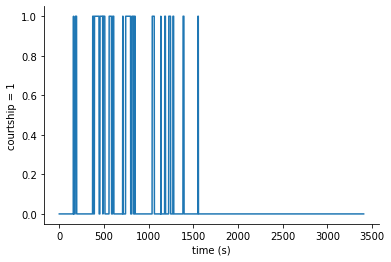

In [ ]:
#Plot the time series so far (only for video 1)
plt.plot(Fly0_data)
plt.ylabel('courtship = 1')
plt.xlabel('time (s)')
sns.despine()

For Fly1:

In [ ]:
### Start from row 1 (row 0 contains the offset data)
### Fly 1 have 6 rows of data in video 1
for data_row in range(5):
  #Read that row's data to figure out the start and the end of the courtship in seconds
  #Use that as an index to mark the courtship as 1 (=was courting at that time)
  start_index=video1_data_frame_numbers.iloc[data_row+1,2]
  end_index=video1_data_frame_numbers.iloc[data_row+1,3]
  Fly1_data[start_index:end_index]=1

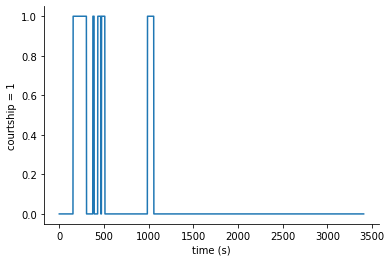

In [ ]:
#Plot the time series so far (only for video 1)
plt.plot(Fly1_data)
plt.ylabel('courtship = 1')
plt.xlabel('time (s)')
sns.despine()

For Fly2:

In [ ]:
### Start from row 1 (row 0 contains the offset data)
### Fly 2 have 3 rows of data in video 1
for data_row in range(2):
  #Read that row's data to figure out the start and the end of the courtship in seconds
  #Use that as an index to mark the courtship as 1 (=was courting at that time)
  start_index=video1_data_frame_numbers.iloc[data_row+1,4]
  end_index=video1_data_frame_numbers.iloc[data_row+1,5]
  Fly2_data[start_index:end_index]=1

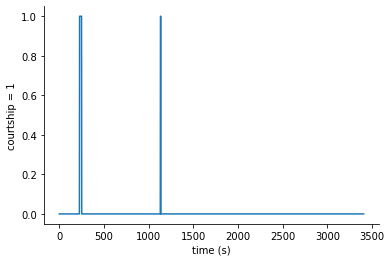

In [ ]:
#Plot the time series so far (only for video 1)
plt.plot(Fly2_data)
plt.ylabel('courtship = 1')
plt.xlabel('time (s)')
sns.despine()

For Fly3: (4th fly)

In [ ]:
### Start from row 1 (row 0 contains the offset data)
### Fly 3 have 1 rows of data in video 1
data_row=0
#Read that row's data to figure out the start and the end of the courtship in seconds
#Use that as an index to mark the courtship as 1 (=was courting at that time)
start_index=video1_data_frame_numbers.iloc[data_row+1,6]
end_index=video1_data_frame_numbers.iloc[data_row+1,7]
Fly3_data[start_index:end_index]=1

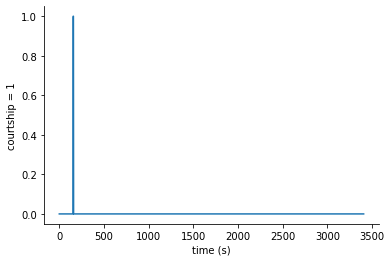

In [ ]:
#Plot the time series so far (only for video 1)
plt.plot(Fly3_data)
plt.ylabel('courtship = 1')
plt.xlabel('time (s)')
sns.despine()

For Fly4: (5th fly)

In [ ]:
### Start from row 1 (row 0 contains the offset data)
### Fly 4 have 1 rows of data in video 1
data_row=0
#Read that row's data to figure out the start and the end of the courtship in seconds
#Use that as an index to mark the courtship as 1 (=was courting at that time)
start_index=video1_data_frame_numbers.iloc[data_row+1,8]
end_index=video1_data_frame_numbers.iloc[data_row+1,9]
Fly4_data[start_index:end_index]=1

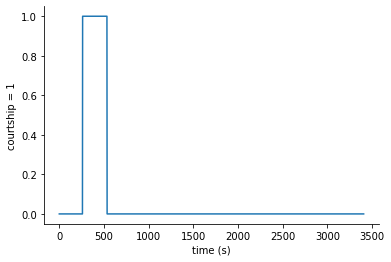

In [ ]:
#Plot the time series so far (only for video 1)
plt.plot(Fly4_data)
plt.ylabel('courtship = 1')
plt.xlabel('time (s)')
sns.despine()

For Fly5: (6th fly)

In [ ]:
### Start from row 1 (row 0 contains the offset data)
### Fly 5 have 7 rows of data in video 1
for data_row in range(6):
  #Read that row's data to figure out the start and the end of the courtship in seconds
  #Use that as an index to mark the courtship as 1 (=was courting at that time)
  start_index=video1_data_frame_numbers.iloc[data_row+1,10]
  end_index=video1_data_frame_numbers.iloc[data_row+1,11]
  Fly5_data[start_index:end_index]=1

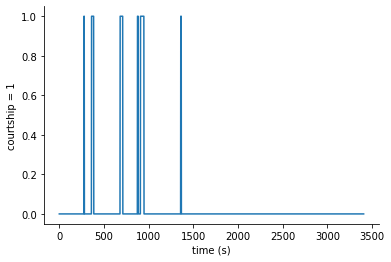

In [ ]:
#Plot the time series so far (only for video 1)
plt.plot(Fly5_data)
plt.ylabel('courtship = 1')
plt.xlabel('time (s)')
sns.despine()

For Fly6: (7th fly)

In [ ]:
### Start from row 1 (row 0 contains the offset data)
### Fly 6 have 9 rows of data in video 1
for data_row in range(8):
  #Read that row's data to figure out the start and the end of the courtship in seconds
  #Use that as an index to mark the courtship as 1 (=was courting at that time)
  start_index=video1_data_frame_numbers.iloc[data_row+1,12]
  end_index=video1_data_frame_numbers.iloc[data_row+1,13]
  Fly6_data[start_index:end_index]=1

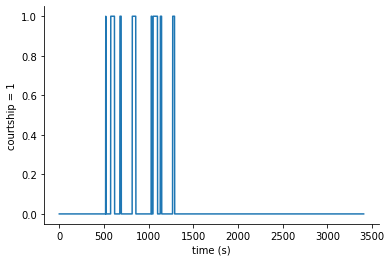

In [ ]:
#Plot the time series so far (only for video 1)
plt.plot(Fly6_data)
plt.ylabel('courtship = 1')
plt.xlabel('time (s)')
sns.despine()

For Fly7: (8th fly)

In [ ]:
### Start from row 1 (row 0 contains the offset data)
### Fly 7 have 18 rows of data in video 1
for data_row in range(17):
  #Read that row's data to figure out the start and the end of the courtship in seconds
  #Use that as an index to mark the courtship as 1 (=was courting at that time)
  start_index=video1_data_frame_numbers.iloc[data_row+1,14]
  end_index=video1_data_frame_numbers.iloc[data_row+1,15]
  Fly7_data[start_index:end_index]=1

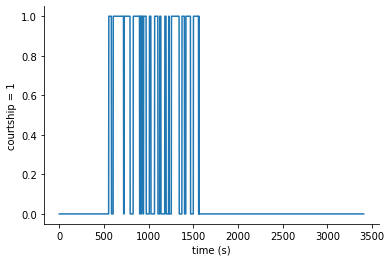

In [ ]:
#Plot the time series so far (only for video 1)
plt.plot(Fly7_data)
plt.ylabel('courtship = 1')
plt.xlabel('time (s)')
sns.despine()

For Fly8: (9th fly)

In [ ]:
### Start from row 1 (row 0 contains the offset data)
### Fly 8 have 5 rows of data in video 1
for data_row in range(4):
  #Read that row's data to figure out the start and the end of the courtship in seconds
  #Use that as an index to mark the courtship as 1 (=was courting at that time)
  start_index=video1_data_frame_numbers.iloc[data_row+1,16]
  end_index=video1_data_frame_numbers.iloc[data_row+1,17]
  Fly8_data[start_index:end_index]=1

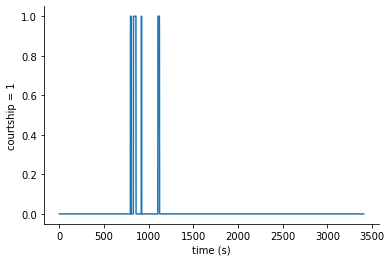

In [ ]:
#Plot the time series so far (only for video 1)
plt.plot(Fly8_data)
plt.ylabel('courtship = 1')
plt.xlabel('time (s)')
sns.despine()

For Fly9: (10th fly)

In [ ]:
### Start from row 1 (row 0 contains the offset data)
### Fly 9 have 14 rows of data in video 1
for data_row in range(13):
  #Read that row's data to figure out the start and the end of the courtship in seconds
  #Use that as an index to mark the courtship as 1 (=was courting at that time)
  start_index=video1_data_frame_numbers.iloc[data_row+1,18]
  end_index=video1_data_frame_numbers.iloc[data_row+1,19]
  Fly9_data[start_index:end_index]=1

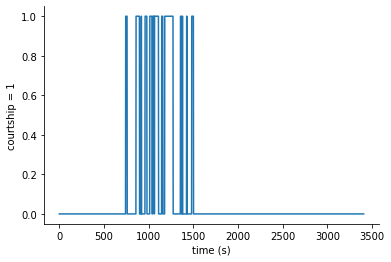

In [ ]:
#Plot the time series so far (only for video 1)
plt.plot(Fly9_data)
plt.ylabel('courtship = 1')
plt.xlabel('time (s)')
sns.despine()

### Now mark for the second video: Need the offset of 1587 seconds

In [ ]:
offset=1587

For Fly 0: (we count from 0)

In [ ]:
### Start from row 0 now
### Fly 0 have 9 rows of data in video 2
for data_row in range(9):
  #Read that row's data to figure out the start and the end of the courtship in seconds
  #Use that as an index to mark the courtship as 1 (=was courting at that time)
  start_index=video2_data_frame_numbers.iloc[data_row,0]+offset
  end_index=video2_data_frame_numbers.iloc[data_row,1]+offset
  Fly0_data[start_index:end_index]=1

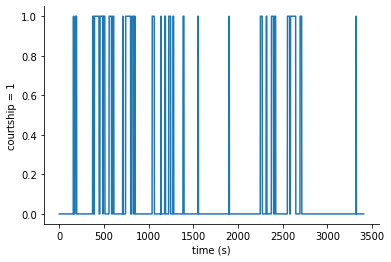

In [ ]:
#Plot the time series so far (only for video 1)
plt.plot(Fly0_data)
plt.ylabel('courtship = 1')
plt.xlabel('time (s)')
sns.despine()

For Fly 1: 2nd fly

In [ ]:
#We have no courtship observed for fly1 in the second video. So it will remain 0.

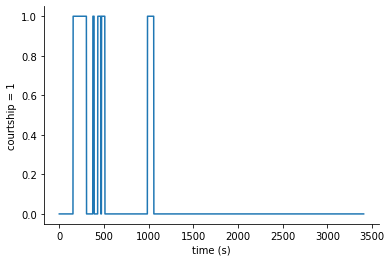

In [ ]:
#Plot the time series so far (only for video 1)
plt.plot(Fly1_data)
plt.ylabel('courtship = 1')
plt.xlabel('time (s)')
sns.despine()

For Fly 2: 3rd fly

In [ ]:
### Start from row 0 now
### Fly 2 have 3 rows of data in video 2
for data_row in range(3):
  #Read that row's data to figure out the start and the end of the courtship in seconds
  #Use that as an index to mark the courtship as 1 (=was courting at that time)
  start_index=video2_data_frame_numbers.iloc[data_row,4]+offset
  end_index=video2_data_frame_numbers.iloc[data_row,5]+offset
  Fly2_data[start_index:end_index]=1

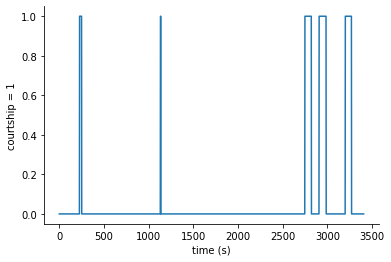

In [ ]:
#Plot the time series so far (only for video 1)
plt.plot(Fly2_data)
plt.ylabel('courtship = 1')
plt.xlabel('time (s)')
sns.despine()

For Fly 3: 4th fly

In [ ]:
### Start from row 0 now
### Fly 3 have 5 rows of data in video 2
for data_row in range(5):
  #Read that row's data to figure out the start and the end of the courtship in seconds
  #Use that as an index to mark the courtship as 1 (=was courting at that time)
  start_index=video2_data_frame_numbers.iloc[data_row,6]+offset
  end_index=video2_data_frame_numbers.iloc[data_row,7]+offset
  Fly3_data[start_index:end_index]=1

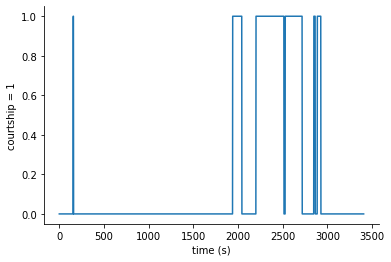

In [ ]:
#Plot the time series so far (only for video 1)
plt.plot(Fly3_data)
plt.ylabel('courtship = 1')
plt.xlabel('time (s)')
sns.despine()

For Fly 4: 5th fly

In [ ]:
#Fly4 also have no courtship observed for the video 2.

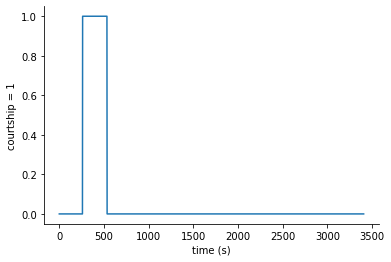

In [ ]:
#Plot the time series
plt.plot(Fly4_data)
plt.ylabel('courtship = 1')
plt.xlabel('time (s)')
sns.despine()

For Fly 5: 6th fly

In [ ]:
### Start from row 0 now
### Fly 5 have 8 rows of data in video 2
for data_row in range(8):
  #Read that row's data to figure out the start and the end of the courtship in seconds
  #Use that as an index to mark the courtship as 1 (=was courting at that time)
  start_index=video2_data_frame_numbers.iloc[data_row,10]+offset
  end_index=video2_data_frame_numbers.iloc[data_row,11]+offset
  Fly5_data[start_index:end_index]=1

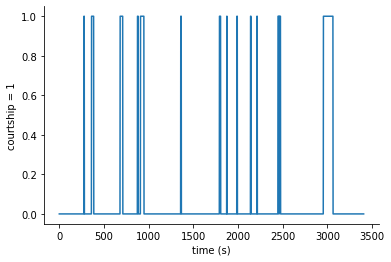

In [ ]:
#Plot the time series so far (only for video 1)
plt.plot(Fly5_data)
plt.ylabel('courtship = 1')
plt.xlabel('time (s)')
sns.despine()

For Fly 6: 7th fly

In [ ]:
### Start from row 0 now
### Fly 6 have 11 rows of data in video 2
for data_row in range(11):
  #Read that row's data to figure out the start and the end of the courtship in seconds
  #Use that as an index to mark the courtship as 1 (=was courting at that time)
  start_index=video2_data_frame_numbers.iloc[data_row,12]+offset
  end_index=video2_data_frame_numbers.iloc[data_row,13]+offset
  Fly6_data[start_index:end_index]=1

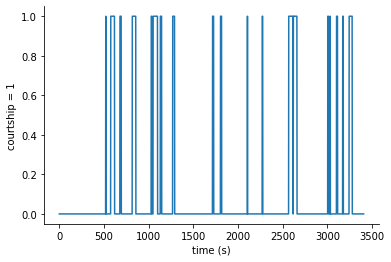

In [ ]:
#Plot the time series so far (only for video 1)
plt.plot(Fly6_data)
plt.ylabel('courtship = 1')
plt.xlabel('time (s)')
sns.despine()

For Fly 7: 8th fly

In [ ]:
### Start from row 0 now
### Fly 7 have 29 rows of data in video 2
for data_row in range(29):
  #Read that row's data to figure out the start and the end of the courtship in seconds
  #Use that as an index to mark the courtship as 1 (=was courting at that time)
  start_index=video2_data_frame_numbers.iloc[data_row,14]+offset
  end_index=video2_data_frame_numbers.iloc[data_row,15]+offset
  Fly7_data[start_index:end_index]=1

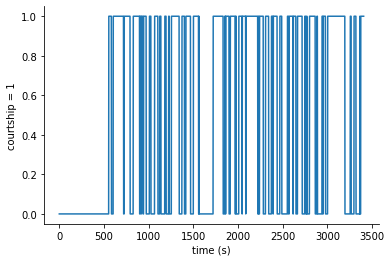

In [ ]:
#Plot the time series so far (only for video 1)
plt.plot(Fly7_data)
plt.ylabel('courtship = 1')
plt.xlabel('time (s)')
sns.despine()

For Fly 8: 9th fly

In [ ]:
### Start from row 0 now
### Fly 8 have 4 rows of data in video 2
for data_row in range(4):
  #Read that row's data to figure out the start and the end of the courtship in seconds
  #Use that as an index to mark the courtship as 1 (=was courting at that time)
  start_index=video2_data_frame_numbers.iloc[data_row,16]+offset
  end_index=video2_data_frame_numbers.iloc[data_row,17]+offset
  Fly8_data[start_index:end_index]=1

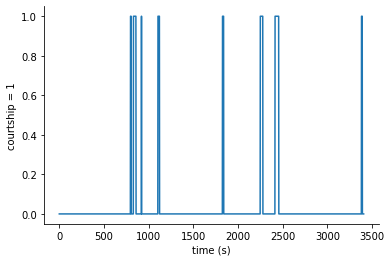

In [ ]:
#Plot the time series so far (only for video 1)
plt.plot(Fly8_data)
plt.ylabel('courtship = 1')
plt.xlabel('time (s)')
sns.despine()

For Fly 9: 10th fly

In [ ]:
### Start from row 0 now
### Fly 9 have 16 rows of data in video 2
for data_row in range(16):
  #Read that row's data to figure out the start and the end of the courtship in seconds
  #Use that as an index to mark the courtship as 1 (=was courting at that time)
  start_index=video2_data_frame_numbers.iloc[data_row,18]+offset
  end_index=video2_data_frame_numbers.iloc[data_row,19]+offset
  Fly9_data[start_index:end_index]=1

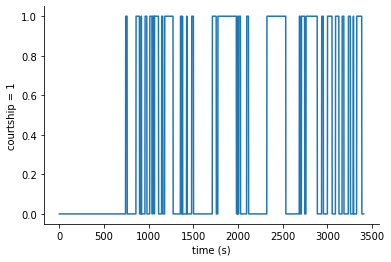

In [ ]:
#Plot the time series so far (only for video 1)
plt.plot(Fly9_data)
plt.ylabel('courtship = 1')
plt.xlabel('time (s)')
sns.despine()

### To account for the fact that most flies were not in the video from the beginning, take away the appropriate number of seconds from the front of the data sequence.

In [ ]:
Fly0_data_new=Fly0_data
Fly1_data_new=Fly1_data[video1_data_frame_numbers.iloc[0,2]:]
Fly2_data_new=Fly2_data[video1_data_frame_numbers.iloc[0,4]:]
Fly3_data_new=Fly3_data[video1_data_frame_numbers.iloc[0,6]:]
Fly4_data_new=Fly4_data[video1_data_frame_numbers.iloc[0,8]:]
Fly5_data_new=Fly5_data[video1_data_frame_numbers.iloc[0,10]:]
Fly6_data_new=Fly6_data[video1_data_frame_numbers.iloc[0,12]:]
Fly7_data_new=Fly7_data[video1_data_frame_numbers.iloc[0,14]:]
Fly8_data_new=Fly8_data[video1_data_frame_numbers.iloc[0,16]:]
Fly9_data_new=Fly9_data[video1_data_frame_numbers.iloc[0,18]:]








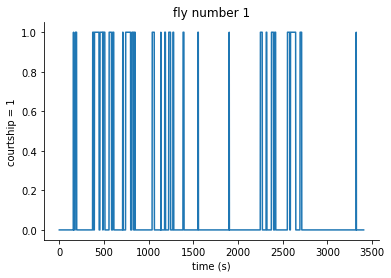

In [ ]:
#Plot the correct time series
plt.plot(Fly0_data_new)
plt.ylabel('courtship = 1')
plt.xlabel('time (s)')
plt.title('fly number 1')
sns.despine()

### Export example fly 1 graph as .pdf

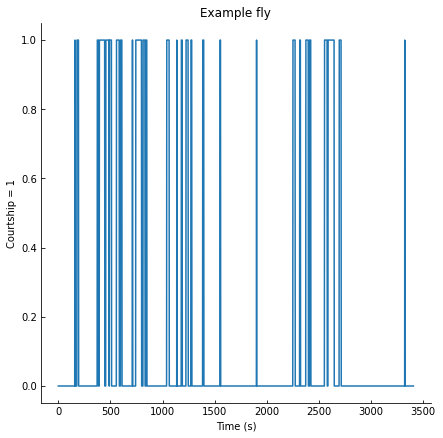

In [ ]:
#Plot the average time series.
fig, axs = plt.subplots(1, 1,figsize=(7,7))

#Plot the correct time series
axs.plot(Fly0_data_new)
axs.set_ylabel('Courtship = 1')
axs.set_xlabel('Time (s)')
axs.set_title('Example fly')
sns.despine()

fig.savefig(path+"_example_fly_minute_graph.pdf",transparent=True)

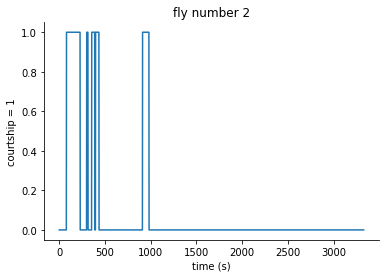

In [ ]:
#Plot the correct time series
plt.plot(Fly1_data_new)
plt.ylabel('courtship = 1')
plt.xlabel('time (s)')
plt.title('fly number 2')
sns.despine()

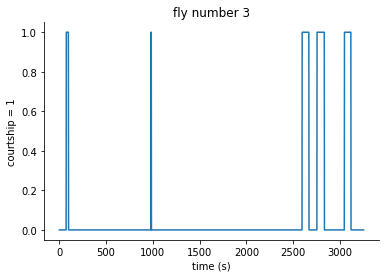

In [ ]:
#Plot the correct time series
plt.plot(Fly2_data_new)
plt.ylabel('courtship = 1')
plt.xlabel('time (s)')
plt.title('fly number 3')
sns.despine()

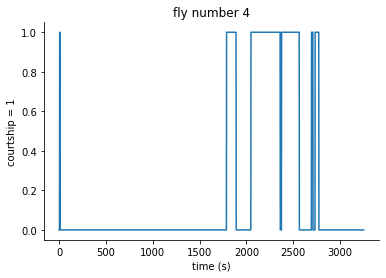

In [ ]:
#Plot the correct time series
plt.plot(Fly3_data_new)
plt.ylabel('courtship = 1')
plt.xlabel('time (s)')
plt.title('fly number 4')
sns.despine()

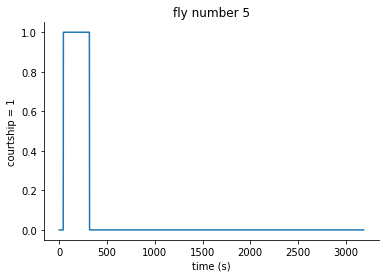

In [ ]:
#Plot the correct time series
plt.plot(Fly4_data_new)
plt.ylabel('courtship = 1')
plt.xlabel('time (s)')
plt.title('fly number 5')
sns.despine()

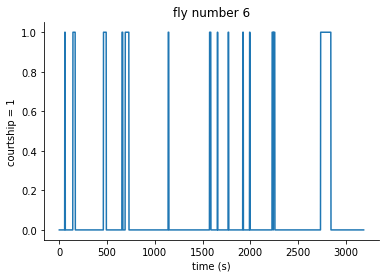

In [ ]:
#Plot the correct time series
plt.plot(Fly5_data_new)
plt.ylabel('courtship = 1')
plt.xlabel('time (s)')
plt.title('fly number 6')
sns.despine()

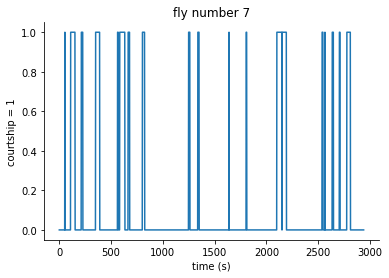

In [ ]:
#Plot the correct time series
plt.plot(Fly6_data_new)
plt.ylabel('courtship = 1')
plt.xlabel('time (s)')
plt.title('fly number 7')
sns.despine()

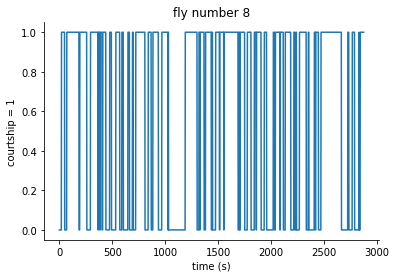

In [ ]:
#Plot the correct time series
plt.plot(Fly7_data_new)
plt.ylabel('courtship = 1')
plt.xlabel('time (s)')
plt.title('fly number 8')
sns.despine()

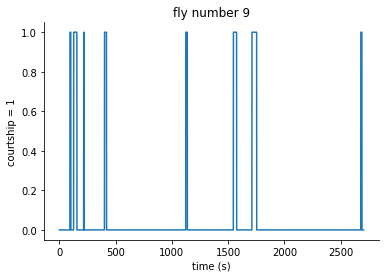

In [ ]:
#Plot the correct time series
plt.plot(Fly8_data_new)
plt.ylabel('courtship = 1')
plt.xlabel('time (s)')
plt.title('fly number 9')
sns.despine()

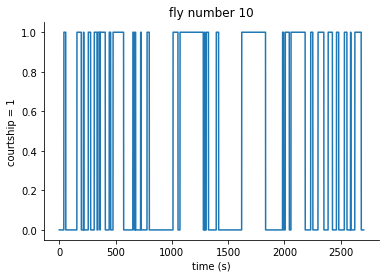

In [ ]:
#Plot the correct time series
plt.plot(Fly9_data_new)
plt.ylabel('courtship = 1')
plt.xlabel('time (s)')
plt.title('fly number 10')
sns.despine()

### Make the one minute average of the proportion of time spent courting.

* each fly will have different number of bins, just round off to the closest minute.

### Plot for each fly

* For first fly, also exports as .pdf

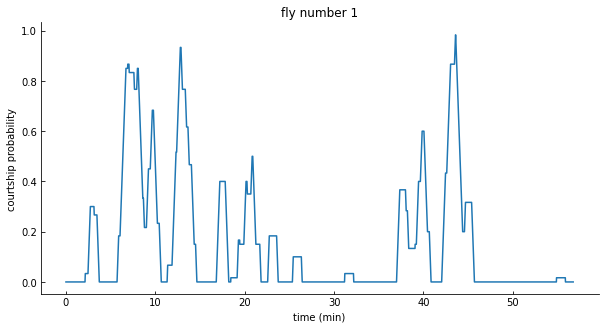

In [ ]:
Fly0_data_new_filtered=uniform_filter1d(Fly0_data_new[:,0].astype(np.float_),size=60,axis=0)
fig, axs = plt.subplots(1, 1,figsize=(10,5))

axs.plot(Fly0_data_new_filtered)
axs.set_ylabel('courtship probability')
axs.set_xlabel('time (min)')
axs.set_xticks([0,600,1200,1800,2400,3000])
axs.set_xticklabels([0,10,20,30,40,50])
axs.set_title('fly number 1')
sns.despine()


fig.savefig(path+"_example_fly_minute_average_graph.pdf",transparent=True)

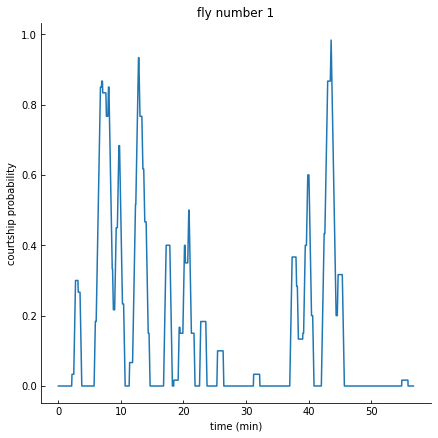

In [ ]:

fig, axs = plt.subplots(1, 1,figsize=(7,7))

axs.plot(Fly0_data_new_filtered)
axs.set_ylabel('courtship probability')
axs.set_xlabel('time (min)')
axs.set_xticks([0,600,1200,1800,2400,3000])
axs.set_xticklabels([0,10,20,30,40,50])
axs.set_title('fly number 1')
sns.despine()


fig.savefig(path+"_example_fly_minute_average_graph.pdf",transparent=True)

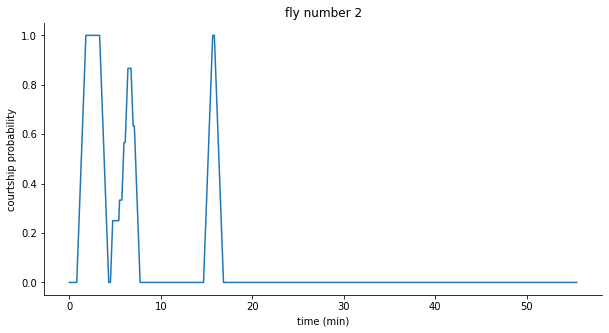

In [ ]:
Fly1_data_new_filtered=uniform_filter1d(Fly1_data_new[:,0].astype(np.float_),size=60,axis=0)
fig, axs = plt.subplots(1, 1,figsize=(10,5))

axs.plot(Fly1_data_new_filtered)
axs.set_ylabel('courtship probability')
axs.set_xlabel('time (min)')
axs.set_xticks([0,600,1200,1800,2400,3000])
axs.set_xticklabels([0,10,20,30,40,50])
axs.set_title('fly number 2')
sns.despine()


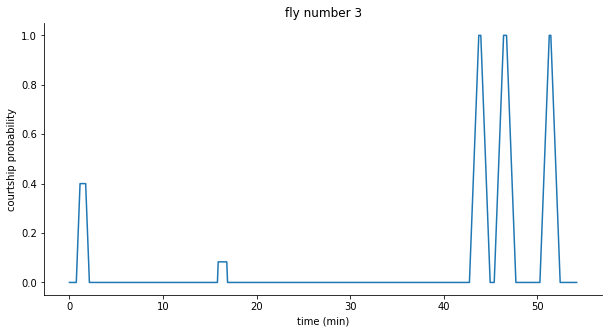

In [ ]:
Fly2_data_new_filtered=uniform_filter1d(Fly2_data_new[:,0].astype(np.float_),size=60,axis=0)
fig, axs = plt.subplots(1, 1,figsize=(10,5))

axs.plot(Fly2_data_new_filtered)
axs.set_ylabel('courtship probability')
axs.set_xlabel('time (min)')
axs.set_xticks([0,600,1200,1800,2400,3000])
axs.set_xticklabels([0,10,20,30,40,50])
axs.set_title('fly number 3')
sns.despine()

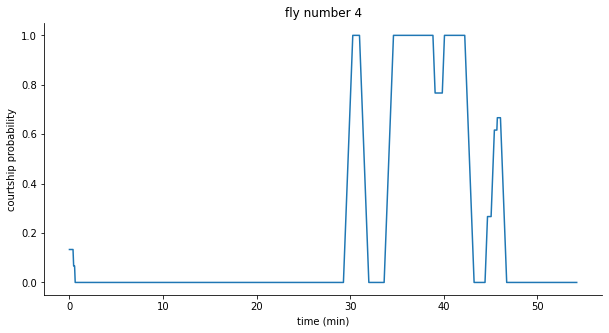

In [ ]:
Fly3_data_new_filtered=uniform_filter1d(Fly3_data_new[:,0].astype(np.float_),size=60,axis=0)
fig, axs = plt.subplots(1, 1,figsize=(10,5))

axs.plot(Fly3_data_new_filtered)
axs.set_ylabel('courtship probability')
axs.set_xlabel('time (min)')
axs.set_xticks([0,600,1200,1800,2400,3000])
axs.set_xticklabels([0,10,20,30,40,50])
axs.set_title('fly number 4')
sns.despine()

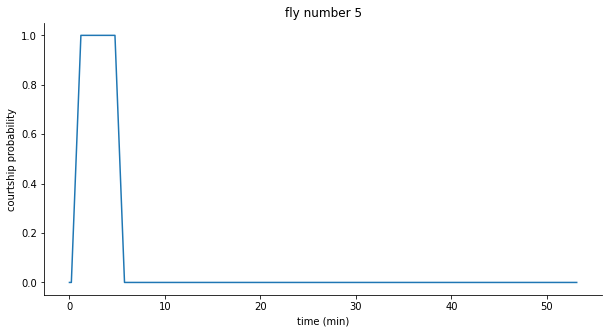

In [ ]:
Fly4_data_new_filtered=uniform_filter1d(Fly4_data_new[:,0].astype(np.float_),size=60,axis=0)
fig, axs = plt.subplots(1, 1,figsize=(10,5))

axs.plot(Fly4_data_new_filtered)
axs.set_ylabel('courtship probability')
axs.set_xlabel('time (min)')
axs.set_xticks([0,600,1200,1800,2400,3000])
axs.set_xticklabels([0,10,20,30,40,50])
axs.set_title('fly number 5')
sns.despine()

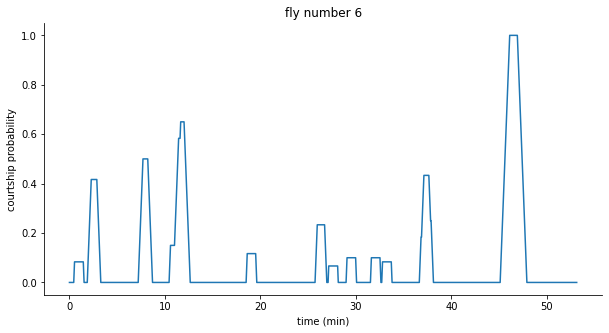

In [ ]:
Fly5_data_new_filtered=uniform_filter1d(Fly5_data_new[:,0].astype(np.float_),size=60,axis=0)
fig, axs = plt.subplots(1, 1,figsize=(10,5))

axs.plot(Fly5_data_new_filtered)
axs.set_ylabel('courtship probability')
axs.set_xlabel('time (min)')
axs.set_xticks([0,600,1200,1800,2400,3000])
axs.set_xticklabels([0,10,20,30,40,50])
axs.set_title('fly number 6')
sns.despine()

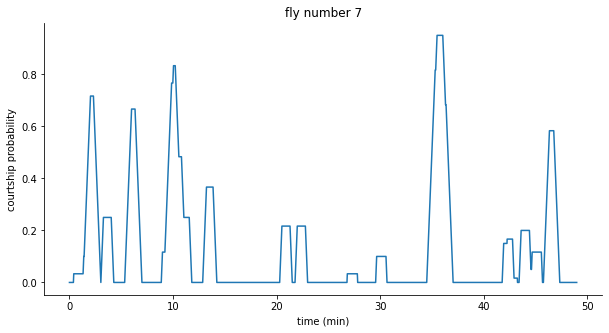

In [ ]:
Fly6_data_new_filtered=uniform_filter1d(Fly6_data_new[:,0].astype(np.float_),size=60,axis=0)
fig, axs = plt.subplots(1, 1,figsize=(10,5))

axs.plot(Fly6_data_new_filtered)
axs.set_ylabel('courtship probability')
axs.set_xlabel('time (min)')
axs.set_xticks([0,600,1200,1800,2400,3000])
axs.set_xticklabels([0,10,20,30,40,50])
axs.set_title('fly number 7')
sns.despine()

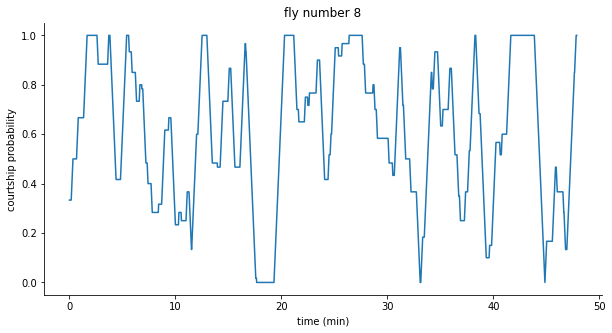

In [ ]:
Fly7_data_new_filtered=uniform_filter1d(Fly7_data_new[:,0].astype(np.float_),size=60,axis=0)
fig, axs = plt.subplots(1, 1,figsize=(10,5))

axs.plot(Fly7_data_new_filtered)
axs.set_ylabel('courtship probability')
axs.set_xlabel('time (min)')
axs.set_xticks([0,600,1200,1800,2400,3000])
axs.set_xticklabels([0,10,20,30,40,50])
axs.set_title('fly number 8')
sns.despine()

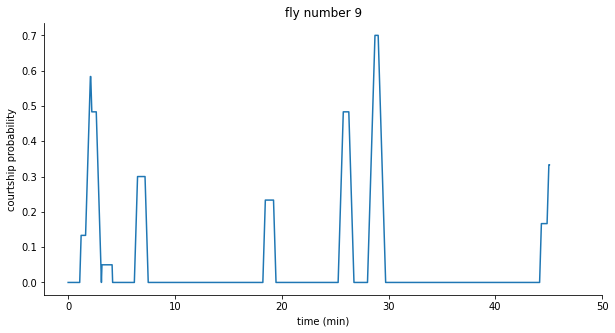

In [ ]:
Fly8_data_new_filtered=uniform_filter1d(Fly8_data_new[:,0].astype(np.float_),size=60,axis=0)
fig, axs = plt.subplots(1, 1,figsize=(10,5))

axs.plot(Fly8_data_new_filtered)
axs.set_ylabel('courtship probability')
axs.set_xlabel('time (min)')
axs.set_xticks([0,600,1200,1800,2400,3000])
axs.set_xticklabels([0,10,20,30,40,50])
axs.set_title('fly number 9')
sns.despine()

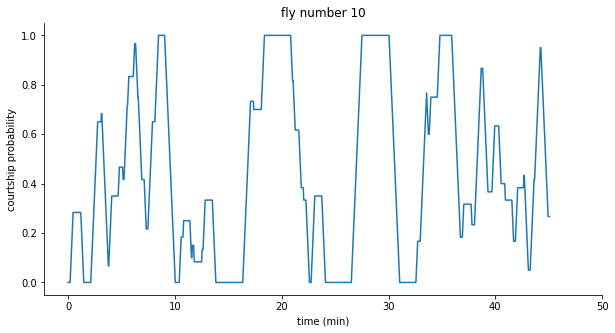

In [ ]:
Fly9_data_new_filtered=uniform_filter1d(Fly9_data_new[:,0].astype(np.float_),size=60,axis=0)
fig, axs = plt.subplots(1, 1,figsize=(10,5))

axs.plot(Fly9_data_new_filtered)
axs.set_ylabel('courtship probability')
axs.set_xlabel('time (min)')
axs.set_xticks([0,600,1200,1800,2400,3000])
axs.set_xticklabels([0,10,20,30,40,50])
axs.set_title('fly number 10')
sns.despine()

### Plot them all together

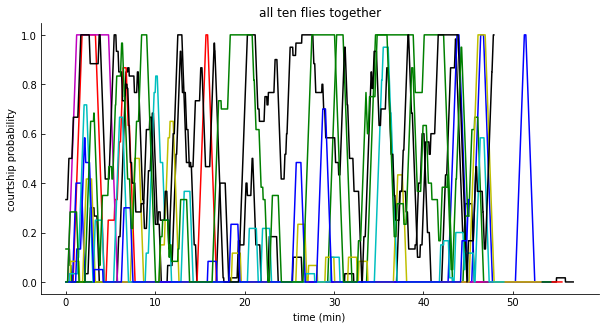

In [ ]:

fig, axs = plt.subplots(1, 1,figsize=(10,5))

axs.plot(Fly0_data_new_filtered,'k')
axs.plot(Fly1_data_new_filtered,'r')
axs.plot(Fly2_data_new_filtered,'b')
axs.plot(Fly3_data_new_filtered,'g')
axs.plot(Fly4_data_new_filtered,'m')
axs.plot(Fly5_data_new_filtered,'y')
axs.plot(Fly6_data_new_filtered,'c')
axs.plot(Fly7_data_new_filtered,'k')
axs.plot(Fly8_data_new_filtered,'b')
axs.plot(Fly9_data_new_filtered,'g')

axs.set_ylabel('courtship probability')
axs.set_xlabel('time (min)')
axs.set_xticks([0,600,1200,1800,2400,3000])
axs.set_xticklabels([0,10,20,30,40,50])
axs.set_title('all ten flies together')
sns.despine()


fig.savefig(path+"_example_fly_minute_average_all_graph.pdf",transparent=True)

### Try to take average up to the point where we have all the fly's data.

In [ ]:
#10th fly should have the least number of points.
#we just average to that point.
data_points=Fly9_data_new_filtered.shape[0]

In [ ]:
average_trace=(Fly0_data_new_filtered[0:data_points]+Fly1_data_new_filtered[0:data_points]+Fly2_data_new_filtered[0:data_points]+Fly3_data_new_filtered[0:data_points]+Fly4_data_new_filtered[0:data_points]+Fly5_data_new_filtered[0:data_points]+Fly6_data_new_filtered[0:data_points]+Fly7_data_new_filtered[0:data_points]+Fly8_data_new_filtered[0:data_points]+Fly9_data_new_filtered[0:data_points])/10

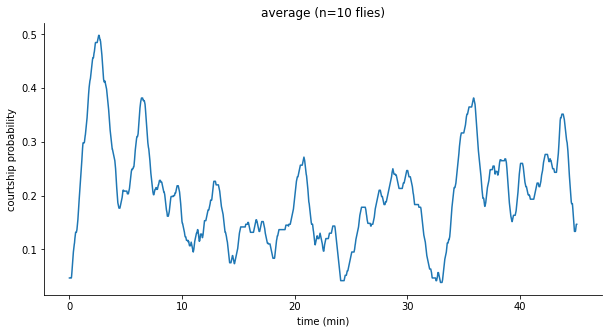

In [ ]:
#Plot the average time series.
fig, axs = plt.subplots(1, 1,figsize=(10,5))

axs.plot(average_trace)
axs.set_ylabel('courtship probability')
axs.set_xlabel('time (min)')
axs.set_xticks([0,600,1200,1800,2400])
axs.set_xticklabels([0,10,20,30,40])
axs.set_title('average (n=10 flies)')
sns.despine()

### For the points up to where we have all the fly's data, try to run PCA and plot each fly as one data point in PC space.

In [ ]:
Fly0_data_new_filtered.shape

(3406,)

In [ ]:
#For running the PCA using the sklearn.decomposition.PCA, we need to transformt the data matrix
#to be n_samples row and n_features (in this case time series)


#Initialie the data array
n_of_flies=10
DataArray=np.zeros((n_of_flies,data_points))

DataArray[0,:]=Fly0_data_new_filtered[0:data_points]
DataArray[1,:]=Fly1_data_new_filtered[0:data_points]
DataArray[2,:]=Fly2_data_new_filtered[0:data_points]
DataArray[3,:]=Fly3_data_new_filtered[0:data_points]
DataArray[4,:]=Fly4_data_new_filtered[0:data_points]
DataArray[5,:]=Fly5_data_new_filtered[0:data_points]
DataArray[5,:]=Fly6_data_new_filtered[0:data_points]
DataArray[7,:]=Fly7_data_new_filtered[0:data_points]
DataArray[8,:]=Fly8_data_new_filtered[0:data_points]
DataArray[9,:]=Fly9_data_new_filtered[0:data_points]



## Reduce data dimension using PCA

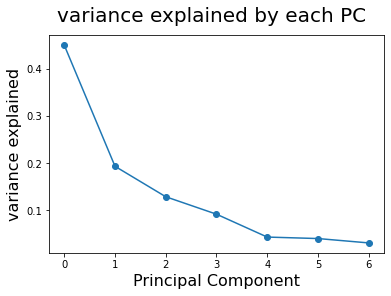

In [ ]:

#Run PCA to reduce the features to the top 10 or so.
from sklearn.decomposition import PCA

#Chose 7 components for now because we know this should be enough for this dataset
pca=PCA(n_components=7)
pca.fit(DataArray)

#check the variance explained.
#print(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_,'o-')
plt.suptitle('variance explained by each PC', fontsize = 20)
plt.ylabel('variance explained', fontsize = 16)
plt.xlabel('Principal Component', fontsize=16)
plt.show()

#trasform the Data
DataArrayPCA=pca.transform(DataArray)

#plt.scatter(DataArrayPCA[:,0],DataArrayPCA[:,1])
#plt.show()
    

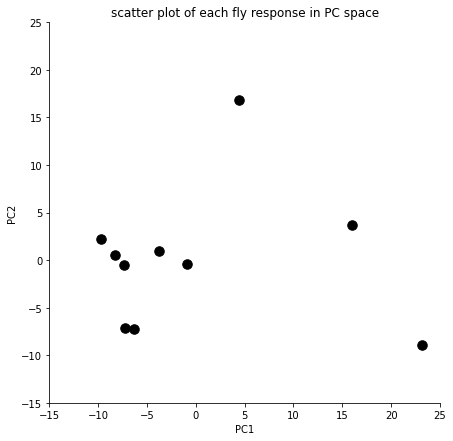

In [ ]:
#Plot the average time series.
fig, axs = plt.subplots(1, 1,figsize=(7,7))

axs.scatter(DataArrayPCA[:,0],DataArrayPCA[:,1], c='black', s=90)
axs.set_ylabel('PC2')
axs.set_xlabel('PC1')
#axs.set_xticks([0,600,1200,1800,2400])
#axs.set_xticklabels([0,10,20,30,40])
axs.set_xlim([-15, 25])
axs.set_ylim([-15,25])
axs.set_title('scatter plot of each fly response in PC space')
sns.despine()

In [ ]:
DataArrayPCA[:,0]

array([-0.94526695, -6.3695508 , -8.23842694,  4.4534377 , -7.23332634,
       -3.74657255, -9.70059215, 23.13121822, -7.38745117, 16.03653098])

In [ ]:
DataArrayPCA[:,1]

array([-0.40226095, -7.27083428,  0.53137864, 16.87433053, -7.14001225,
        0.98303463,  2.17774431, -8.92824364, -0.4826889 ,  3.65755191])

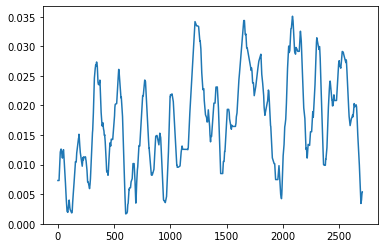

In [ ]:
plt.plot(pca.components_[0])

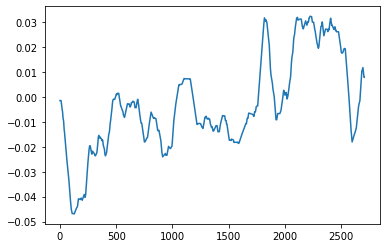

In [ ]:
plt.plot(pca.components_[1])

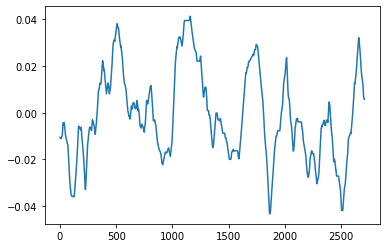

In [ ]:
plt.plot(pca.components_[2])

### For the minute averaged fly activity traces, see if the decline in the middle is statistically significant

* Average the values for the first 10 minutes, middle 10 minutes, and the final 10 miniutes.

* Run ANOVA to check the statistical significance

In [ ]:
import matplotlib
#We need this to export Type2/True Type fonts when exporting figure
matplotlib.rcParams['pdf.fonttype']=42
matplotlib.rcParams['ps.fonttype']=42
matplotlib.rcParams['xtick.direction']='in'
matplotlib.rcParams['ytick.direction']='in'


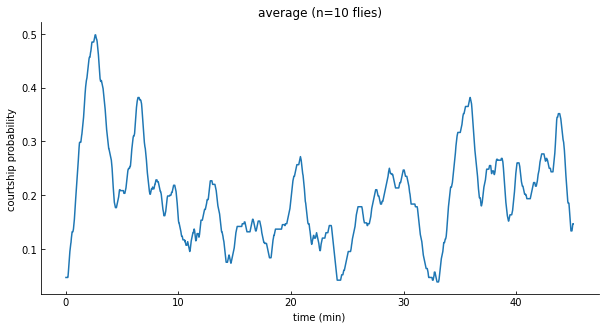

In [ ]:
#Plot the average time series.
fig, axs = plt.subplots(1, 1,figsize=(10,5))

axs.plot(average_trace)
axs.set_ylabel('courtship probability')
axs.set_xlabel('time (min)')
axs.set_xticks([0,600,1200,1800,2400])
axs.set_xticklabels([0,10,20,30,40])
axs.set_title('average (n=10 flies)')
sns.despine()

fig.savefig(path+"_average_activity.pdf",transparent=True)

### Make average activity for the following time slots
* 2 to 12 min (120 to 720 seconds)

* 18 to 28 min (1080 to 1680 seconds)

* 35 to 45 min (2100 to 2700 seconds)

In [ ]:
First_ten=np.average(DataArray[:,120:720],axis=1)
print(First_ten)

[0.29338889 0.32583333 0.001      0.         0.3275     0.26055556
 0.         0.59633333 0.07902778 0.46      ]


In [ ]:
Middle_ten=np.average(DataArray[:,1080:1680],axis=1)
print(Middle_ten)

[0.09752778 0.         0.         0.         0.         0.04666667
 0.         0.68930556 0.07166667 0.49775   ]


In [ ]:
Last_ten=np.average(DataArray[:,2100:2700],axis=1)
print(Last_ten)

[0.26591667 0.         0.12166667 0.76427778 0.         0.17886111
 0.         0.63344444 0.01363889 0.49338889]


In [ ]:
First_ten=First_ten.reshape((10,1))
Middle_ten=Middle_ten.reshape((10,1))
Last_ten=Last_ten.reshape((10,1))

In [ ]:
all_ten_data=np.concatenate((First_ten,Middle_ten,Last_ten),axis=1)
all_ten_data=all_ten_data.transpose()
print(all_ten_data)

[[0.29338889 0.32583333 0.001      0.         0.3275     0.26055556
  0.         0.59633333 0.07902778 0.46      ]
 [0.09752778 0.         0.         0.         0.         0.04666667
  0.         0.68930556 0.07166667 0.49775   ]
 [0.26591667 0.         0.12166667 0.76427778 0.         0.17886111
  0.         0.63344444 0.01363889 0.49338889]]


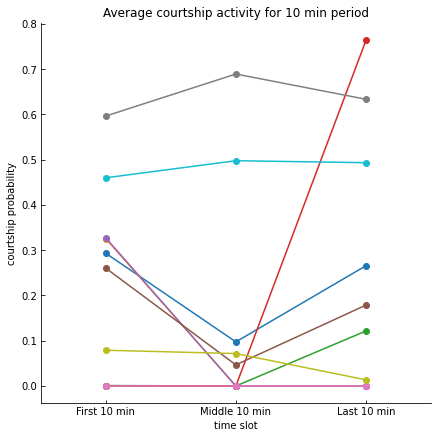

In [ ]:
#Plot the average time series.
fig, axs = plt.subplots(1, 1,figsize=(7,7))
axs.plot(all_ten_data,'o-')
axs.set_ylabel('courtship probability')
axs.set_xlabel('time slot')
axs.set_xticks([0,1,2])
axs.set_xlim([-0.5,2.5])
axs.set_xticklabels(['First 10 min','Middle 10 min','Last 10 min'])
axs.set_title('Average courtship activity for 10 min period')
sns.despine()

fig.savefig(path+"_average_activity_10min_period_line.pdf",transparent=True)

### Run the repeated measures one way ANOVA

* Need to setup the dataset in a different format

In [ ]:
all_ten_data_long=np.concatenate((First_ten,Middle_ten,Last_ten),axis=0)
print(all_ten_data_long)

[[0.29338889]
 [0.32583333]
 [0.001     ]
 [0.        ]
 [0.3275    ]
 [0.26055556]
 [0.        ]
 [0.59633333]
 [0.07902778]
 [0.46      ]
 [0.09752778]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.04666667]
 [0.        ]
 [0.68930556]
 [0.07166667]
 [0.49775   ]
 [0.26591667]
 [0.        ]
 [0.12166667]
 [0.76427778]
 [0.        ]
 [0.17886111]
 [0.        ]
 [0.63344444]
 [0.01363889]
 [0.49338889]]


In [ ]:
ten_minute_data=pd.DataFrame({'fly': np.tile([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 3),
                   'time_point': np.repeat([1, 2, 3], 10),
                   'response': all_ten_data_long[:,0]})

In [ ]:
ten_minute_data.head

<bound method NDFrame.head of     fly  time_point  response
0     1           1  0.293389
1     2           1  0.325833
2     3           1  0.001000
3     4           1  0.000000
4     5           1  0.327500
5     6           1  0.260556
6     7           1  0.000000
7     8           1  0.596333
8     9           1  0.079028
9    10           1  0.460000
10    1           2  0.097528
11    2           2  0.000000
12    3           2  0.000000
13    4           2  0.000000
14    5           2  0.000000
15    6           2  0.046667
16    7           2  0.000000
17    8           2  0.689306
18    9           2  0.071667
19   10           2  0.497750
20    1           3  0.265917
21    2           3  0.000000
22    3           3  0.121667
23    4           3  0.764278
24    5           3  0.000000
25    6           3  0.178861
26    7           3  0.000000
27    8           3  0.633444
28    9           3  0.013639
29   10           3  0.493389>

In [ ]:
from statsmodels.stats.anova import AnovaRM

#perform the repeated measures ANOVA
print(AnovaRM(data=ten_minute_data, depvar='response', subject='fly', within=['time_point']).fit())


                 Anova
           F Value Num DF  Den DF Pr > F
----------------------------------------
time_point  1.1627 2.0000 18.0000 0.3350



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
